<a href="https://colab.research.google.com/github/lizihao6868/-/blob/master/meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

clusters ( 3 ):  [{'centroid': array([-1.75384615, -2.46153846]), 'frequency': array([87., 87., 83., 83., 56., 38., 24., 18., 20., 26., 26., 24., 28.,
       29., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])}, {'centroid': array([1.63636364, 2.48181818]), 'frequency': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 46., 31., 22., 32., 32., 39., 26., 20., 33., 29., 32.,
       39., 36.,  0.,  0.])}, {'centroid': array([5.85, 1.6 ]), 'frequency': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4.])}]


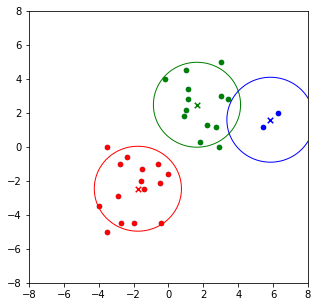

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Input data set
X = np.array([
    [-4, -3.5], [-3.5, -5], [-2.7, -4.5],
    [-2, -4.5], [-2.9, -2.9], [-0.4, -4.5],
    [-1.4, -2.5], [-1.6, -2], [-1.5, -1.3],
    [-0.5, -2.1], [-0.6, -1], [0, -1.6],
    [-2.8, -1], [-2.4, -0.6], [-3.5, 0],
    [-0.2, 4], [0.9, 1.8], [1, 2.2],
    [1.1, 2.8], [1.1, 3.4], [1, 4.5],
    [1.8, 0.3], [2.2, 1.3], [2.9, 0],
    [2.7, 1.2], [3, 3], [3.4, 2.8],
    [3, 5], [5.4, 1.2], [6.3, 2]
])


def mean_shift(data, radius=2.0):
    clusters = []
    for i in range(len(data)):
        cluster_centroid = data[i]
        cluster_frequency = np.zeros(len(data))

        # Search points in circle
        while True:
            temp_data = []
            for j in range(len(data)):
                v = data[j]
                # Handle points in the circles
                if np.linalg.norm(v - cluster_centroid) <= radius:
                    temp_data.append(v)
                    cluster_frequency[i] += 1

            # Update centroid
            old_centroid = cluster_centroid
            new_centroid = np.average(temp_data, axis=0)
            cluster_centroid = new_centroid
            # Find the mode
            if np.array_equal(new_centroid, old_centroid):
                break

        # Combined 'same' clusters
        has_same_cluster = False
       
        
            
        for cluster in clusters:
            if np.linalg.norm(cluster['centroid'] - cluster_centroid) <= radius:
                has_same_cluster = True
                cluster['frequency'] = cluster['frequency'] + cluster_frequency
                break
        if not has_same_cluster:
            clusters.append({
                'centroid': cluster_centroid,
                'frequency': cluster_frequency
            })
        

    print('clusters (', len(clusters), '): ', clusters)
    clustering(data, clusters)
    show_clusters(clusters, radius)


# Clustering data using frequency
def clustering(data, clusters):
    t = []
    for cluster in clusters:
        cluster['data'] = []
        t.append(cluster['frequency'])
    t = np.array(t)
    # Clustering
    for i in range(len(data)):
        column_frequency = t[:, i]
        cluster_index = np.where(column_frequency == np.max(column_frequency))[0][0]
        clusters[cluster_index]['data'].append(data[i])


# Plot clusters
def show_clusters(clusters, radius):
    colors = 10 * ['r', 'g', 'b', 'k', 'y']
    plt.figure(figsize=(5, 5))
    plt.xlim((-8, 8))
    plt.ylim((-8, 8))
    plt.scatter(X[:, 0], X[:, 1], s=20)
    theta = np.linspace(0, 2 * np.pi, 800)
    for i in range(len(clusters)):
        cluster = clusters[i]
        data = np.array(cluster['data'])
        plt.scatter(data[:, 0], data[:, 1], color=colors[i], s=20)
        centroid = cluster['centroid']
        plt.scatter(centroid[0], centroid[1], color=colors[i], marker='x', s=30)
        x, y = np.cos(theta) * radius + centroid[0], np.sin(theta) * radius + centroid[1]
        plt.plot(x, y, linewidth=1, color=colors[i])
    plt.show()


mean_shift(X, 2.5)